# Example for the catgranule 2 webserver

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Bio.Seq import Seq
from Bio import SeqIO
from glob import glob

import math
from sklearn.decomposition import PCA

import random
from dtw import dtw
from scipy.signal import savgol_filter

import subprocess
import os
import pandas as pd
import random

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

# Import some data to play with
from scipy.stats import pearsonr
from stringScalesFunctions import *


from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

from compute_profiles_and_predictions import *
#HumanProt = list(SeqIO.parse("HumanProteome.fasta", "fasta"))
import re

from catgranuleFunctions import *


In [2]:
c_o_c = ['Normalizedfrequencyofbeta-sheetinall-betaclass-Palauetal--Int-J-PeptideProteinRes-1981-19-394-401',
 'Aggregationmed-Tartaglia-JMolBiol2008-380-2--425-36',
 'Normalizedfrequencyofcoil-Nagano-J-Mol-Biol-1973-75-401-420',
 'Aggregationhigh-Ferdandez-Escamilla-Nat-Biotechnol-2004-22-10--1302-6',
 'Membrane-buriedpreferenceparameters-Argosetal--Eur-J-Biochem-1982-128-565-575',
 'Hydrophobicity-Rao_Argos-Biochim-Biophys-Acta1986-869-197-214',
 'Averagerelativeprobabilityofbeta-sheet-Kanehisa-Tsong-Biopolymers1980-19-1617-1628',
 'Normalizedfrequencyofbeta-sheet-Chou-Fasman-Adv-Enzymol-1978-47-45-148',
 'Normalizedfrequencyofmiddlehelix-Crawfordetal--Proc-Natl-Acad-Sci-USA1973-70-538-542',
 'Compositionofaminoacidsinmembraneproteins-percent--Cedanoetal--J-Mol-Biol-1997-266-594-600',
 'Normalizedfrequencyofbeta-sheet-Crawfordetal-Proc-Natl-Acad-Sci-USA1973-70-538-542',
 'Averagevolumeofburiedresidue-Chothia-Nature1975-254-304-308',
 'Meanareaburiedontransfer-Roseetal--Science1985-229-834-838',
 'Hydrophobicity-Sweetetal--J-Mol-Biol-1983-171-479-488',
 'NucleicAcidBinding-interface_center-Terribilinietal--RNA2006-12-1450-1462',
 'Relativefrequencyinalpha-helix-Prabhakaran-Biochem-J-1990-269-691-696',
 'Normalizedfrequencyofbeta-sheet-withweights-Levitt-Biochemistry1978-17-4277-4285',
 'charge',
 'Aggregation-Tartaglia-J-Mol-Biol-2010-402-919',
 'Transmembraneregionsofnon-mt-proteins-Nakashimaetal--Proteins1990-8-173-178',
 'Averagedturnpropensitiesinatransmembranehelix-Monneetal--J-Mol-Biol-1999-293-807-814',
 'fg',
 'Informationmeasureforpleated-sheet-Robson-Suzuki-J-Mol-Biol-1976-107-327-356',
 'NucleicAcidBinding-classicalRBD-Castelloetal--Cell2011-149-1393-1406',
 'Normalizedfrequencyofbeta-sheet-unweighted-Levitt-Biochemistry1978-17-4277-4285',
 'Normalizedfrequencyofcoil-Tanaka-Scheraga-Macromolecules1977-10-9-20',
 'Knowledge-basedmembrane-propensityscalefrom3D_HelixinMPtopodatabases-Punta-Maritan-Proteins2003-50-114-121',
 'Ratioofburiedandaccessiblemolarfractions-Janin-Nature1979-277-491-492',
 'Hydrophobicity-Black-Anal-Biochem-1991-193-72-82',
 'Beta-sheet-Deleage-Roux-ProteinEngineering1987-1-289-294',
 'Energytransferfromouttoin-95_buried--Radzicka-Wolfenden-Biochemistry1988-27-1664-1670',
 'TOP-IDB-DunkerAK-ProteinPeptLett-2008-15-9--956',
 'Aggregation-Pawar-J-Mol-Biol-2005-350-379',
 'Normalizedcompositionofmembraneproteins-Nakashimaetal--Proteins1990-8-173-178',
 'Hydrophobicity-Kyte_Doolittle-J-Mol-Biol-1982-157-105-132',
 'Hydrophobicity-Eisenbergetal-J-Mol-Biol-1984-179-125-142',
 'Hydrophobicity-Fauchereetal--Eur-J-Med-Chem-1983-18-369-375',
 'Aggregation-Conchillo-Sole-BMCBioinformatics2007-8-65',
 'Aggregation-Tartaglia-ProteinScience2005-14-2735-2740',
 'UnfoldOverFold-DunkerAK-ProteinPeptLett-2008-15-9--956',
 'Aggregationlow-Ferdandez-Escamilla-Nat-Biotechnol-2004-22-10--1302-6',
 'Hydrophobicity-Janin-Nature1979-277-491-492',
 'Turnpropensityscalefortransmembranehelices-Monneetal--J-Mol-Biol-1999-288-141-145',
 'Normalizedfrequencyofalpha-helix-Burgessetal-Isr-J-Chem-1974-12-239-286',
 'B-Value-DunkerAK-ProteinPeptLett-2008-15-9--956',
 'TheChou-Fasmanparameterofthecoilconformation-Charton-Charton-J-Theor-Biol-1983-111-447-450',
 'Normalizedfrequencyofalpha-helixinall-alphaclass-Palauetal--Int-J-PeptideProteinRes-1981-19-394-401',
 'Percentageofburiedresidues-Janinetal--J-Mol-Biol-1978-125-357-386',
 'NucleicAcidBinding-_interface_close-1-Terribilinietal--RNA2006-12-1450-1462',
 'Informationmeasureforalpha-helix-Robson-Suzuki-J-Mol-Biol-1976-107-327-356',
 'NucleicAcidBinding-interface-NucleicAcidsRes-2011-39-D277',
 'Relativefrequencyinbeta-sheet-Prabhakaran-Biochem-J-1990-269-691-696',
 'Aggregationhigh-Tartaglia-JMolBiol2008-380-2--425-36',
 'Hydrophobicity-Abraham_Leo-Proteins-Structure-FunctionandGenetics1987-2-130-152',
 'rg',
 'Normalizedrelativefrequencyofcoil-Isogaietal--Biopolymers1980-19-1183-1210',
 'NucleicAcidBinding-interface_close+1-Terribilinietal--RNA2006-12-1450-1462',
 'Averageflexibilityindices-Bhaskaran-Ponnuswamy-Int-J-PeptideProteinRes-1988-32-241-255',
 'Coil-Deleage-Roux-ProteinEngineering1987-1-289-294',
 'Aggregationlow-Tartaglia-JMolBiol2008-380-2--425-36',
 'Proportionofresidues95_buried-Chothia-J-Mol-Biol-1976-105-1-14',
 'Normalizedfrequencyofalpha-helix-unweightedLevitt-Biochemistry1978-17-4277-4285',
 'NucleicAcidBinding-nonclassicalRBD-Castelloetal--Cell2011-149-1393-1406',
 'Normalizedfrequencyofalpha-helix-Chou-Fasman-Adv-Enzym-1978-47-45-148',
 'Aggregationmed-Ferdandez-Escamilla-Nat-Biotechnol-2004-22-10--1302-6',
 'Averagerelativeprobabilityofinnerbeta-sheet-Kanehisa-Tsong-Biopolymers1980-19-1617-1628',
 'Propensitytobeburiedinside-Wertz-Scheraga-Macromolecules1978-11-9-15',
 'DisProt-DunkerAK-ProteinPeptLett-2008-15-9--956',
 'Hydrophobicity-Roseman-J-Mol-Biol-1988-200-513-522',
 'Alpha-helix-Deleage-Roux-ProteinEngineering1987-1-289-294',
 'Meanvolumesofresiduesburiedinproteininteriors-Harpazetal--Structure1994-2-641-649',
 'Averagerelativeprobabilityofhelix-Kanehisa-Tsong-Biopolymers1980-19-1617-1628',
 'NucleicAcidBinding-mRNAinteractome-Castelloetal--Cell2011-149-1393-1406',
 'NucleicAcidBinding-HOH-NucleicAcidsRes-2011-39-D277',
 'NucleicAcidBinding-HB-NucleicAcidsRes-2011-39-D277',
 'Normalizedfrequencyofalpha-helix-withweights-Levitt-Biochemistry1978-17-4277-4285',
 'NucleicAcidBinding-unknownRBD-Castelloetal--Cell2011-149-1393-1406',
 'Hydrophobicity-Bull_Breese-Arch-Biochem-Biophys-1974-161-665-670',
 'Transmembraneregionsofmt-proteins-Nakashimaetal--Proteins1990-8-173-178',
 'AAcompositionofmembraneproteins-Nakashimaetal--Proteins1990-8-173-178',
 'Knowledge-basedmembrane-propensityscalefrom1D_HelixinMPtopodatabases-Punta-Maritan-Proteins2003-50-114-121',
 'Proportionofresidues100_buried-Chothia-J-Mol-Biol-1976-105-1-14',
 'n_contacts',
 'RG_protein',
 'rmsd_prot',
 'Length',
 'fullCharge',
 'extCharge',
 'Percentage_Coil_FullSeq',
 'Percentage_AlphaHelix_FullSeq',
 'Percentage_BetaBridge_FullSeq',
 'Percentage_Strand_FullSeq',
 'Percentage_3_10Helix_FullSeq',
 'Percentage_PiHelix_FullSeq',
 'Percentage_Turn_FullSeq',
 'Percentage_Bend_FullSeq',
 'Percentage_Coil_ExtSeq',
 'Percentage_AlphaHelix_ExtSeq',
 'Percentage_BetaBridge_ExtSeq',
 'Percentage_Strand_ExtSeq',
 'Percentage_3_10Helix_ExtSeq',
 'Percentage_PiHelix_ExtSeq',
 'Percentage_Turn_ExtSeq',
 'Percentage_Bend_ExtSeq',
 'asa_mean',
 'asa_std',
 'RBD_Full_min_0',
 'RBD_Full_min_1',
 'RBD_Full_min_2',
 'RBD_Full_indexmin_0',
 'RBD_Full_indexmin_1',
 'RBD_Full_indexmin_2',
 'RBD_int_min_0',
 'RBD_int_min_1',
 'RBD_int_min_2',
 'RBD_int_indexmin_0',
 'RBD_int_indexmin_1',
 'RBD_int_indexmin_2',
 'RBD_ext_min_0',
 'RBD_ext_min_1',
 'RBD_ext_min_2',
 'RBD_ext_indexmin_0',
 'RBD_ext_indexmin_1',
 'RBD_ext_indexmin_2',
 'average_plddt',
 'stddev_plddt',
 'n_contacts_norm',
 'RG_protein_norm']
correct_order_columns = np.array(c_o_c, dtype='str')

In [3]:
def compute_score_from_pdb(pdb_files_string):
    '''Computes the Profiles of the sequences and the predictions of LLPS
    Input: a directory with pdb files
    Output: a Profiles array, a Predictions array'''
    code_dir = os.getcwd()
    scales_dir = './src/ChemicalPhysicalScales_Py_dictionary'
    classifiers_dir = './src/TRAINED_MODELS/'
    af_code_dir = './src/AlphaFold/'
    # convert the pdb string with the files in a list of paths
    pdb_files = get_list_from_pdb_string(pdb_files_string)
    # get the sequences and the according ids
    sequences, ids = get_sequences_from_pdbs(pdb_files)
    # get the dataframe with the physical/chemical properties
    pc_df = get_physical_chemical_properties(sequences, ids, scales_dir)
    # get the correct index | UNCOMMENT THIS IF YOU HAVE AF MODELS
    #pc_df.index = pc_df.index.map(return_af_protein_name)
    # get the dataframe with the alphafold properties
    af_df = get_alphafold_features_from_file(af_code_dir, pdb_files)
    # add plddt columns
    af_complete_df = add_plddt_to_af_features_from_file(pdb_files, af_df)
    # postprocess alphafold features
    postprocessed_af_df = ProcessAF_Features_from_file(af_complete_df)
    # set the uniprot _ID as the index
    postprocessed_af_df.set_index('Uniprot_ID', inplace=True)
    # get the matrixes needed in order to compute the profiles
    # create the combined dataframe of the physical/chemical properties
    cmb_df = pd.concat([pc_df, postprocessed_af_df], axis=1)
    # reorder the columns in order to get the correct columns
    cmb_df = cmb_df[correct_order_columns]
    # get the llps predictions
    predictions = predict(cmb_df, classifiers_dir)
    # create dataframes

    predictions_df = pd.DataFrame(data=predictions, index=ids)

    scoPd = predictions_df.reset_index()
    scoPd.columns=['FileName', 'LLPS_Score']
    # return the according arrays
#     finalDf = pd.merge(scoPd, proPd, on='FileName')
    return scoPd



In [4]:
dimitris=joblib.load("./src/TRAINED_MODELS/ONLY_PHYSCHEM/RandomForest/gridsearchCV_Object.pkl")
dimitris.best_params_

{'classifier__max_depth': None,
 'classifier__n_estimators': 200,
 'scaling__with_mean': True,
 'selector__estimator__l1_ratio': 0.1,
 'selector__estimator__n_alphas': 50}

In [5]:
dimitris.best_score_

0.8445508379808327

##  Load up TDP43 fasta file

In [5]:
from utilities import *

# code for mutation scan
import time

start=time.time()
FASTAINPUTFILE = "./examples/TDP43.fasta"
outputdir="./"

names=[]
mutSeqList=[]

fastaInput=list(SeqIO.parse(FASTAINPUTFILE, "fasta"))
seq=str(fastaInput[0].seq)

for i in range(len(seq)):
    for am in aminoList:
        pos=i

        newAm = am
        names.append(fastaInput[0].id.split('|')[1]+'_'+str(pos)+'_'+str(newAm))
        mutSeq= seqMutation(seq, pos,newAm)
        mutSeqList.append(mutSeq)

tall_mut_file = os.path.join(outputdir, 'TallMutation.fasta' )
write_fasta(mutSeqList, names, tall_mut_file)

fDf = compute_score_profile_fatsa_DF_for_mutscan(tall_mut_file)
                
                
datafile = os.path.join(outputdir,'mutation_scan.csv')
fDf.to_csv(datafile)
zip_df(datafile)   

prof_wt, score_wt = compute_score_and_profile_from_fasta_file_for_mutscan(FASTAINPUTFILE)
fDf['mutation_score'] = fDf['LLPS_Profile'].apply(lambda x: np.sum(np.array(x) - prof_wt[0])/np.mean(prof_wt[0]))



count = 0
hm = []
for i in range(len(seq)):
    hm.append([])
    for am in aminoList:
        hm[-1].append(fDf.mutation_score[count])
        count =count+1



# figure of the mutation scan

plt.figure('HeatMap_mutation', figsize = (10,7))


x_labels=range(1,np.shape(hm)[0]+1)
y_labels=aminoList

im=plt.imshow(np.transpose(hm), aspect='auto', origin='lower', interpolation=None, cmap='PiYG')
cbar = plt.colorbar(im)
cbar.set_label('Mutation Score')



# plt.xticks(ticks=range(len(x_labels)), labels=x_labels)  # Use the custom x-axis labels
step = 25  # Show one label every 25
plt.xticks(ticks=range(0, len(x_labels), step), labels=[x_labels[i] for i in range(0, len(x_labels), step)])



plt.yticks(ticks=range(len(y_labels)), labels=y_labels)  # Use the custom y-axis labels

# Optional: add labels for the axes
plt.ylabel("amino-acid substitution")
plt.xlabel("sequence position")
plt.tight_layout()
print("Saving MutationScan Profile")
# plt.savefig(os.path.join(outputdir,'MutationScan.pdf'))
plt.savefig(os.path.join(outputdir,'MutationScan.png'), dpi=300, bbox_inches='tight')
end=time.time()
print(end-start)

ModuleNotFoundError: No module named 'config'

ModuleNotFoundError: No module named 'utilities'

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Saving MutationScan Profile


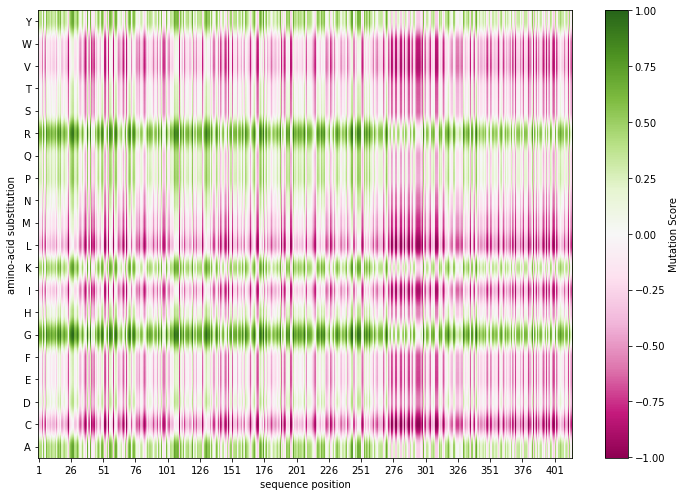

In [6]:
# 
                



In [5]:
scales_dir = './src/ChemicalPhysicalScales_Py_dictionary'
sys.path.append(scales_dir)
names = glob(f'{scales_dir}/*')
names1 = [x.replace(f'{scales_dir}/', '') for x in names]
names1 = [x.replace('.json', '') for x in names1]

In [6]:
# seqTdp43=list(SeqIO.parse("./examples/TDP43.fasta", "fasta"))
seqTdp43=list(SeqIO.parse("ROA1_CAEEL.fasta", "fasta"))
seq=str(seqTdp43[0].seq)

### generate profile and score form a string


In [18]:

seq=str(seqTdp43[0].seq)
# WT_scores,WT_profiles=catGranule2_str(seq)
prof_wt, score_wt = compute_score_and_profile_from_fasta_file("2proteins.fasta")

[array([0.305, 0.345, 0.385, 0.26 , 0.325, 0.25 , 0.52 , 0.51 , 0.325,
       0.37 , 0.62 , 0.36 , 0.62 , 0.385, 0.51 , 0.36 , 0.22 , 0.325,
       0.445, 0.325, 0.37 , 0.22 , 0.595, 0.52 , 0.25 , 0.335, 0.26 ,
       0.62 , 0.62 , 0.22 , 0.345, 0.36 , 0.37 , 0.345, 0.345, 0.385,
       0.385, 0.22 , 0.305, 0.595, 0.325, 0.335, 0.5  , 0.36 , 0.43 ,
       0.335, 0.62 , 0.325, 0.25 , 0.345, 0.385, 0.25 , 0.25 , 0.26 ,
       0.305, 0.595, 0.385, 0.445, 0.345, 0.345, 0.52 , 0.595, 0.36 ,
       0.595, 0.62 , 0.335, 0.62 , 0.335, 0.26 , 0.345, 0.335, 0.36 ,
       0.62 , 0.52 , 0.345, 0.325, 0.26 , 0.385, 0.51 , 0.51 , 0.305,
       0.52 , 0.43 , 0.595, 0.445, 0.39 , 0.25 , 0.25 , 0.385, 0.62 ,
       0.52 , 0.345, 0.26 , 0.385, 0.445, 0.52 , 0.595, 0.51 , 0.26 ,
       0.445, 0.595, 0.385, 0.385, 0.52 , 0.37 , 0.595, 0.36 , 0.325,
       0.36 , 0.37 , 0.26 , 0.36 , 0.345, 0.52 , 0.595, 0.22 , 0.5  ,
       0.26 , 0.36 , 0.62 , 0.26 , 0.595, 0.325, 0.385, 0.39 , 0.345,
       0.325, 0.385

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [15]:
prof_wt[0]

array([0.3209749 , 0.34838912, 0.39560251, 0.4249205 , 0.46375732,
       0.49117155, 0.50792469, 0.53267364, 0.56656067, 0.59130962,
       0.61948536, 0.61301255, 0.63205021, 0.64233054, 0.64156904,
       0.64233054, 0.64309205, 0.65070711, 0.65908368, 0.65108787,
       0.6491841 , 0.62938494, 0.63014644, 0.60920502, 0.606159  ,
       0.59664017, 0.59854393, 0.59854393, 0.59702092, 0.60844351,
       0.60844351, 0.60577824, 0.62710042, 0.60920502, 0.60235146,
       0.60882427, 0.6305272 , 0.63547699, 0.60730126, 0.58635983,
       0.59892469, 0.59169038, 0.58331381, 0.57493724, 0.57189121,
       0.59092887, 0.59092887, 0.59549791, 0.60501674, 0.60806276,
       0.60235146, 0.62291213, 0.6248159 , 0.63205021, 0.65184937,
       0.64461506, 0.66631799, 0.64461506, 0.63966527, 0.64689958,
       0.64613808, 0.64423431, 0.67241004, 0.69297071, 0.69944351,
       0.70096653, 0.67545607, 0.67545607, 0.68040586, 0.69297071,
       0.68992469, 0.68992469, 0.67735983, 0.69525523, 0.68383

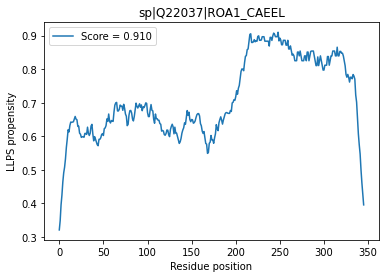

In [19]:
plt.plot(prof_wt[0], label= 'Score = %.3lf'%score_wt[0])
# plt.plot(smooth(WT_profiles,21), label= 'Score = %.3lf'%WT_scores)

plt.xlabel('Residue position')
plt.ylabel('LLPS propensity')
plt.title('%s'%(seqTdp43[0].id))
# plt.ylim(0.2,0.9)
plt.legend()

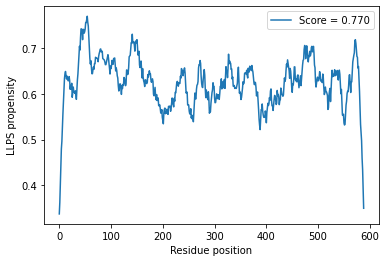

In [22]:
plt.plot(prof_wt[1], label= 'Score = %.3lf'%score_wt[1])
# plt.plot(smooth(WT_profiles,21), label= 'Score = %.3lf'%WT_scores)

plt.xlabel('Residue position')
plt.ylabel('LLPS propensity')
# plt.title('%s'%(seqTdp43[1].id))
# plt.ylim(0.2,0.9)
plt.legend()

In [3]:
df=compute_score_and_profile_from_pdb("./pdb_files/AF-Q2Q9Z6-F1-model_v4.pdb")

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
df.columns[df.isna().any()].tolist()

['RBD_int_min_0', 'RBD_int_min_1', 'RBD_int_min_2']

In [9]:
df.loc[:,['RBD_int_min_0', 'RBD_int_min_1', 'RBD_int_min_2']]

,RBD_int_min_0,RBD_int_min_1,RBD_int_min_2
AF-Q2Q9Z6-F1-model_v4,NaN,NaN,NaN


In [5]:
dfs=[]
i=0
for f in os.listdir("./pdb_files/"):
    print(i+1,f)
    dfs.append(compute_score_and_profile_from_pdb("./pdb_files/"+f))
    i+=1
df = pd.concat(dfs)

1 AF-A0A0K3ATS1-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


2 AF-Q03392-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3 AF-Q06851-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


4 AF-B7JA25-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5 AF-P25603-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


6 AF-A0A1T5HUK6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


7 AF-F4JXN6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


8 AF-A0A2K3D3T0-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


9 AF-Q9TXM1-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


10 AF-G5EDE7-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


11 AF-P0C093-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


12 AF-B7JB30-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


13 AF-Q03513-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


14 AF-Q95XR4-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


15 AF-Q9VWE6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


16 AF-P42212-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


17 AF-Q9VV90-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


18 AF-B7JB29-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


19 AF-P95648-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


20 AF-P00873-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


21 AF-P07987-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


22 AF-P0A9A6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


23 AF-Q2Q9Z6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


24 AF-Q12113-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


25 AF-Q9A749-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


26 AF-P39548-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


27 AF-P03069-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


28 AF-P91870-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


29 AF-Q9V7U0-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


30 AF-P62694-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


31 AF-Q4LB35-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


32 AF-Q9W4M2-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


33 AF-P18566-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


34 AF-A0A2K3DA85-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


35 AF-Q9XWB4-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


36 AF-A8IVP7-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


37 AF-A0A2K3D5S9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


38 AF-G5EBV6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


39 AF-A0A178UYI6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


40 AF-Q23494-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


41 AF-Q8L3W1-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


42 AF-A0A178WIB5-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


43 AF-Q9W4I7-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


44 AF-Q8LAP2-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


45 AF-A7LPC6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


46 AF-Q95Q04-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


47 AF-G5EG87-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


48 AF-Q8LDU1-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


49 AF-A0A0G2UMW8-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


50 AF-Q18130-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


51 AF-P18573-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


52 AF-P83260-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


53 AF-A0A2K3DAA9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


54 AF-Q16987-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


55 AF-A0A654FF09-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


56 AF-P91349-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


57 AF-P00880-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


58 AF-P0CT76-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


59 AF-A0A0G2UHG9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


60 AF-A0A2K3DIJ3-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


61 AF-A0A2K3E1J3-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


62 AF-Q22053-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


63 AF-Q9TZQ3-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


64 AF-X5DSL3-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


65 AF-P19659-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


66 AF-B7XGW9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


67 AF-Q20530-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


68 AF-E1UZH7-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


69 AF-Q8SXU1-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


70 AF-Q9NAB6-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


71 AF-A0A0B4K7N3-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


72 AF-G5EG56-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


73 AF-P0AEX9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


74 AF-P04716-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


75 AF-O13514-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


76 AF-O14076-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


77 AF-D7F951-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


78 AF-P02945-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


79 AF-O13825-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


80 AF-B7JA24-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


81 AF-A0A7G2EFD9-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


82 AF-P78953-F1-model_v4.pdb


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
df.to_csv("/mnt/large/jfiorentino/catGRANULE2/prova_cdhit/LLPSDB_02_catgranule2.csv")

In [9]:
def get_physical_chemical_profiles(sequences, scales_dir, classifiers_dir, correct_order_columns):
    sys.path.append(scales_dir)
    names = glob(f'{scales_dir}/*')
    names1 = [x.replace(f'{scales_dir}/', '') for x in names]
    names1 = [x.replace('.json', '') for x in names1]

    n_cores = 22

    X = [(f, names, 7, False) for f in sequences]

    results = []

    if n_cores == None or n_cores > mp.cpu_count():
        pool = mp.Pool(mp.cpu_count())
    else:
        pool = mp.Pool(n_cores)  # If the user wants to use a specified number of cores

    pl = pool.starmap_async(compute_chemphysProfiles, X)
    results = pl.get()
    pool.close()
    
    rf_classifier = joblib.load(classifiers_dir + "ONLY_PHYSCHEM/RandomForest/gridsearchCV_Object.pkl")
    profiles = []
    # for each protein...
    for i in range(len(results)):
        # ...set the protein matrix
        mat = results[i]
        # create a dataframe with indexes the name of the features
        mat_df = pd.DataFrame(mat, index=names1)
        # ... reindex the dataframe in order to get the correct order
        correct_order_df = mat_df.reindex(index=correct_order_columns[:82])
        # ... compute the profile
        profile = ComputeProfile_fromMatrix2(correct_order_df, rf_classifier,window=21)
        # ... append it in the profiles array
        profiles.append(np.array(profile))
   
    return profiles

In [21]:
prof=get_physical_chemical_profiles(seq,"./src/ChemicalPhysicalScales_Py_dictionary/","./src/TRAINED_MODELS/",correct_order_columns)

ValueError: Input X contains NaN.
SelectFromModel does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### from uniprot id

In [12]:
seqTdp43=list(SeqIO.parse("TDP43.fasta", "fasta"))
proteinImport = fromUniprot('Q13148')[0]
seq=str(proteinImport.seq)

seq=str(seqTdp43[0].seq)
WT_scores,WT_profiles=catGranule2_str(seq)
plt.plot(WT_profiles, label= 'Score = %.3lf'%WT_scores)
plt.xlabel('Residue position')
plt.ylabel('LLPS propensity')
plt.title('%s'%(proteinImport.id))
plt.legend()

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
str(fromUniprot('Q13148')[0].seq)

'MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNPVSQCMRGVRLVEGILHAPDAGWGNLVYVVNYPKDNKRKMDETDASSAVKVKRAVQKTSDLIVLGLPWKTTEQDLKEYFSTFGEVLMVQVKKDLKTGHSKGFGFVRFTEYETQVKVMSQRHMIDGRWCDCKLPNSKQSQDEPLRSRKVFVGRCTEDMTEDELREFFSQYGDVMDVFIPKPFRAFAFVTFADDQIAQSLCGEDLIIKGISVHISNAEPKHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNSYSGSNSGAAIGWGSASNAGSGSGFNGGFGSSMDSKSSGWGM'

In [3]:
fasta_file='catgranule_LLPS_PSP.fasta'

fDf1 = compute_score_profile_fatsa_DF(fasta_file)
# fDf.to_csv("FuzDrop_02_LLPS_catgranule2_fromfasta.csv")

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [5]:
fDf1.to_csv("llps_yeast_catgranule2_fromfasta.csv")

In [11]:
fasta_file='LLPS_FuzDrop_02.fasta'

fDf1 = compute_score_profile_fatsa_DF(fasta_file)
# fDf.to_csv("FuzDrop_02_LLPS_catgranule2_fromfasta.csv")

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [9]:
fasta_file='nonLLPS_FuzDrop_02.fasta'

fDf = compute_score_profile_fatsa_DF(fasta_file)
fDf.to_csv("FuzDrop_02_nonLLPS_catgranule2_fromfasta.csv")

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [12]:
fDf1

,Name,LLPS_Score,LLPS_Profile
0,tr|A0A0G2UHG9|A0A0G2UHG9_DOSGI,0.490,"[0.16822263797942003, 0.18014031805425632, 0.2..."
1,tr|A0A0G2UMW8|A0A0G2UMW8_DOSGI,0.465,"[0.15690724088973024, 0.16835068622811167, 0.1..."
2,tr|A0A2K3DA85|A0A2K3DA85_CHLRE,0.345,"[0.1602627430373095, 0.17875459800315294, 0.19..."
3,tr|D3KYQ3|D3KYQ3_TETTH,0.615,"[0.2820274599542334, 0.31692906178489705, 0.33..."
4,tr|E1UZH7|E1UZH7_ECOLX,0.640,"[0.31194360523665665, 0.33353474320241705, 0.3..."
...,...,...,...
70,sp|Q9TZQ3|PGL1_CAEEL,0.685,"[0.22961507618283888, 0.26367281475541304, 0.2..."
71,sp|Q9V7U0|RESIL_DROME,0.685,"[0.2151290035587189, 0.2462099644128114, 0.264..."
72,sp|Q9W1V3|FBRL_DROME,0.710,"[0.3014202786377709, 0.3354914860681114, 0.369..."
73,tr|Q9W4I7|Q9W4I7_DROME,0.660,"[0.2754224270353303, 0.2980645161290323, 0.321..."


In [ ]:
dfs=[]
i=0
for f in os.listdir("./pdb_LLPS/"):
    aa = compute_score_from_pdb("./pdb_LLPS/"+f)
    print(aa)
    dfs.append(aa)
    i+=1
df = pd.concat(dfs)

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


                FileName  LLPS_Score
0  AF-Q91349-F1-model_v4    0.347517


/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### generate profile and score form a fasta as lists or as dataframe


In [26]:
fasta_file='newMutations_TDP43_mutated.fasta'

prof, scores = compute_score_and_profile_from_fasta_file(fasta_file)

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
fDf = compute_score_profile_fatsa_DF(fasta_file)

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [35]:
fDf

,Name,LLPS_Score,LLPS_Profile
0,TDP43_333_K,0.881716,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."
1,TDP43_321_K,0.872718,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."
2,TDP43_327_P,0.861247,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."
3,TDP43_327_V,0.874903,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."
4,TDP43_359_Y,0.874290,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."
5,TDP43_334_I,0.871023,"[0.3, 0.295, 0.255, 0.235, 0.28, 0.56, 0.61, 0..."


### generate dataframe from a single PDB or list of  PDB files



In [10]:

a =compute_score_and_profile_from_pdb('AF-Q13148-F1-model_v4.pdb')

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
b =compute_score_profile_ListPdb(['AF-Q13148-F1-model_v4.pdb','AF-X6R8D5-F1-model_v4.pdb'])

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Mutation analysis of one single protein

In [105]:
names=[]
mutSeqList=[]

fastaInput=list(SeqIO.parse("TDP43.fasta", "fasta"))
seq=str(fastaInput[0].seq)

for i in range(len(seq)):
    for am in aminoList:

        pos=i
        newAm = am
        
        names.append(fastaInput[0].id.split('|')[1]+'_'+str(pos)+'_'+str(newAm))

        mutSeq= seqMutation(seq, pos,newAm)


        mutSeqList.append(mutSeq)


In [106]:
write_fasta(mutSeqList, names,'TPD_allMutation.fasta')

In [107]:


fDf = compute_score_profile_fatsa_DF('TPD_allMutation.fasta')

In [ ]:



prof_wt, score_wt = compute_score_and_profile_from_fasta_file('TDP43.fasta')

/Users/mmonti/anaconda3/envs/predenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:

fDf['mutation_score'] = fDf['LLPS_Profile'].apply(lambda x: np.sum(np.array(x) - prof_wt[0])/np.mean(prof_wt))


,Name,LLPS_Score,LLPS_Profile,mutation_score
0,Q131480_A,0.870449,"[0.3, 0.3, 0.275, 0.245, 0.325, 0.53, 0.615, 0...",0.501074
1,Q131480_C,0.866452,"[0.3, 0.285, 0.26, 0.25, 0.26, 0.49, 0.5, 0.62...",-0.276102
2,Q131480_D,0.869023,"[0.305, 0.33, 0.32, 0.31, 0.275, 0.45, 0.595, ...",0.449944
3,Q131480_E,0.870187,"[0.3, 0.3, 0.28, 0.235, 0.315, 0.525, 0.59, 0....",0.378362
4,Q131480_F,0.870141,"[0.29, 0.275, 0.245, 0.24, 0.27, 0.49, 0.57, 0...",-0.132938
...,...,...,...,...
8275,Q13148413_S,0.580510,"[0.305, 0.335, 0.37, 0.47, 0.515, 0.495, 0.495...",6.882104
8276,Q13148413_T,0.577374,"[0.305, 0.335, 0.37, 0.47, 0.515, 0.495, 0.495...",7.086625
8277,Q13148413_V,0.580195,"[0.305, 0.335, 0.37, 0.47, 0.515, 0.495, 0.495...",7.188885
8278,Q13148413_W,0.563839,"[0.305, 0.335, 0.37, 0.47, 0.515, 0.495, 0.495...",7.147981


In [85]:



count = 0
hm = []
for i in range(len(seq)):
    hm.append([])
    for am in aminoList:
        hm[-1].append(fDf.mutation_score[count])

        count =count+1




In [93]:

plt.figure('HeatMap_mutation', figsize = (10,7))


x_labels=range(1,np.shape(hm)[0]+1)
y_labels=aminoList

im=plt.imshow(np.transpose(hm), aspect='auto', origin='lower', interpolation=None, cmap='PiYG')
plt.colorbar(im)


# plt.xticks(ticks=range(len(x_labels)), labels=x_labels)  # Use the custom x-axis labels
step = 25  # Show one label every 25
plt.xticks(ticks=range(0, len(x_labels), step), labels=[x_labels[i] for i in range(0, len(x_labels), step)])



plt.yticks(ticks=range(len(y_labels)), labels=y_labels)  # Use the custom y-axis labels

# Optional: add labels for the axes
plt.ylabel("amino-acid substitution")
plt.xlabel("sequence position")
plt.tight_layout()
plt.savefig('MutationScan.pdf')

In [104]:
plt.figure('profile_WT', figsize = (10,7))

plt.plot(prof_wt[0], color='k')

plt.xlabel("Residue position")
plt.ylabel("LLPS propensity")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Profile.pdf')

In [6]:
seq="MPMSQPAAPPVLTVRYEGSERTFAAGHDVVVGRDLRADVRVAHPLISRAHLLLRFDQGRWVAIDNGSLNGLYLNNRRVPVVDIYDAQRVHIGNPDGPALDFEVGRHRGSAGRPPQTTSIRLPNLSAGAWPTDGPPQTGTLGSGQLQQLPPATTRIPAAPPSGPQPRYPTGGQQLWPPSGPQRAPQIYRPPTAAPPPAGARGGTEAGNLATSMMKILRPGRLTGELPPGAVRIGRANDNDIVIPEVLASRHHATLVPTPGGTEIRDNRSINGTFVNGARVDAALLHDGDVVTIGNIDLVFADGTLARREEN"

# WT_scores,WT_profiles=catGranule2_str(seq)
prof_wt, score_wt = compute_score_and_profile_from_aa_text(seq)

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [7]:
score_wt

,RandomForest
Seq1,0.645


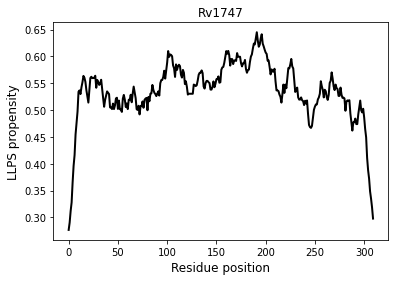

In [34]:
fig,ax = plt.subplots()
ax.set_title("Rv1747",fontsize=12)
ax.set_xlabel("Residue position",fontsize=12)
ax.set_ylabel("LLPS propensity",fontsize=12)
ax.plot(prof_wt['Seq1'],lw=2,color="black")
plt.savefig("LLPS_prof_Rv1747_WT.pdf")

In [ ]:
T152A
T210A

In [17]:
seq2 = list(seq)
seq2[151]='A'
seq2="".join(seq2)
prof_wt_T152A, score_wt_T152A = compute_score_and_profile_from_aa_text(seq2)

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [18]:
seq3 = list(seq)
seq3[209]='A'
seq3="".join(seq3)
prof_wt_T210A, score_wt_T210A = compute_score_and_profile_from_aa_text(seq3)

/mnt/large/jfiorentino/INTERACTomics/PREDICTOR/pred-venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [19]:
print(score_wt,score_wt_T152A,score_wt_T210A)

      RandomForest
Seq1         0.645       RandomForest
Seq1          0.61       RandomForest
Seq1          0.61


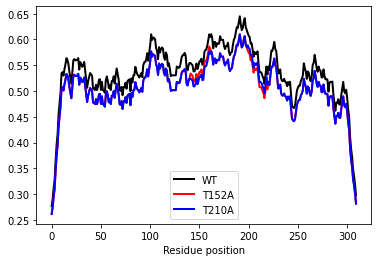

In [21]:
fig,ax = plt.subplots()
ax.set_xlabel("Residue position")
plt.plot(prof_wt['Seq1'],color = "black",lw=2,label="WT")
plt.plot(prof_wt_T152A['Seq1'],lw=2,label = "T152A",color="red")
plt.plot(prof_wt_T210A['Seq1'],lw=2,label = "T210A",color="blue")
plt.legend()

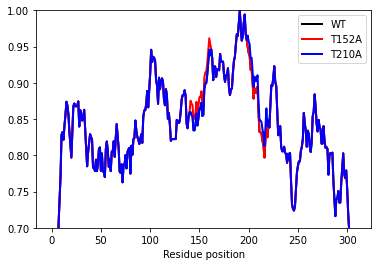

In [24]:
fig,ax = plt.subplots()
ax.set_xlabel("Residue position")
ax.set_ylim(0.7,1)
plt.plot(prof_wt['Seq1']/0.645,color = "black",lw=2,label="WT")
plt.plot(prof_wt_T152A['Seq1']/0.61,lw=2,label = "T152A",color="red")
plt.plot(prof_wt_T210A['Seq1']/0.61,lw=2,label = "T210A",color="blue")
plt.legend()

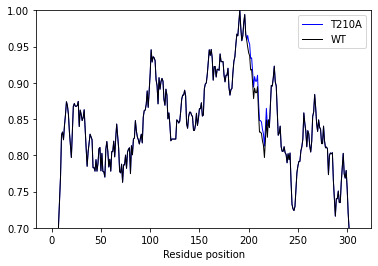

In [27]:
fig,ax = plt.subplots()
ax.set_xlabel("Residue position")
ax.set_ylim(0.7,1)
# plt.plot(prof_wt_T152A['Seq1']/0.61,lw=1,label = "T152A",color="red")
plt.plot(prof_wt_T210A['Seq1']/0.61,lw=1,label = "T210A",color="blue")
plt.plot(prof_wt['Seq1']/0.645,color = "black",lw=1,label="WT")

plt.legend()

In [30]:
seq2

'MPMSQPAAPPVLTVRYEGSERTFAAGHDVVVGRDLRADVRVAHPLISRAHLLLRFDQGRWVAIDNGSLNGLYLNNRRVPVVDIYDAQRVHIGNPDGPALDFEVGRHRGSAGRPPQTTSIRLPNLSAGAWPTDGPPQTGTLGSGQLQQLPPAATRIPAAPPSGPQPRYPTGGQQLWPPSGPQRAPQIYRPPTAAPPPAGARGGTEAGNLATSMMKILRPGRLTGELPPGAVRIGRANDNDIVIPEVLASRHHATLVPTPGGTEIRDNRSINGTFVNGARVDAALLHDGDVVTIGNIDLVFADGTLARREEN'

In [31]:
seq3


'MPMSQPAAPPVLTVRYEGSERTFAAGHDVVVGRDLRADVRVAHPLISRAHLLLRFDQGRWVAIDNGSLNGLYLNNRRVPVVDIYDAQRVHIGNPDGPALDFEVGRHRGSAGRPPQTTSIRLPNLSAGAWPTDGPPQTGTLGSGQLQQLPPATTRIPAAPPSGPQPRYPTGGQQLWPPSGPQRAPQIYRPPTAAPPPAGARGGTEAGNLAASMMKILRPGRLTGELPPGAVRIGRANDNDIVIPEVLASRHHATLVPTPGGTEIRDNRSINGTFVNGARVDAALLHDGDVVTIGNIDLVFADGTLARREEN'